In [2]:
import marvin
marvin.config.download = True
marvin.config.release = 'DR17'

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import scipy.stats as sci
plt.ion()

from marvin.tools.vacs import VACs
from astropy.io import fits
import numpy as np
from marvin.tools import Maps
from marvin.tools import Cube

from marvin import config #Needed to fix "Cube not subscriptable" when running in Sciserver
config.forceDbOff() #Needed to fix "Cube not subscriptable" when running in Sciserver

print('Marvin and Matplotlib imported. Warnings about missing paths/files are typical, so no need to be concerned')

Marvin and Matplotlib imported. Warnings about missing paths/files are typical, so no need to be concerned


In [3]:
pipe3d = 'https://data.sdss.org/sas/dr17/manga/spectro/pipe3d/v3_1_1/3.1.1/12514/manga-12514-9101.Pipe3D.cube.fits.gz'
#to get a pipe3D fits file for a specific galaxy change the number after 3.1.1. to the MaNGA plate number and the numbers after manga- with the plateifu value
hdu=fits.open(pipe3d)
mass=hdu[1].data[19]
mangaid = '12514-9101' #MaNGA plate-ifu of the galaxy
maps = marvin.tools.Maps(mangaid)
data = maps.vacs.gz3d

In [50]:
style = {
    'lines.linewidth': 1.5,
    'font.size': 16.0,
    'axes.linewidth': 1.5,
    'axes.titlesize': 'large',
    'axes.labelsize': 'large',
    'xtick.major.size': 6,
    'xtick.minor.size': 4,
    'xtick.major.width': 1.5,
    'xtick.minor.width': 1.5,
    'xtick.major.pad': 6,
    'xtick.minor.pad': 6,
    'xtick.labelsize': 'medium',
    'ytick.major.size': 6,
    'ytick.minor.size': 4,
    'ytick.major.width': 1.5,
    'ytick.minor.width': 1.5,
    'ytick.major.pad': 6,
    'ytick.minor.pad': 6,
    'ytick.labelsize': 'medium',
    'legend.fancybox': True,
    'legend.fontsize': 'small',
    'legend.scatterpoints': 5,
    'legend.loc': 'best',
    'figure.titlesize': 'large',
}

plt.style.use(style)

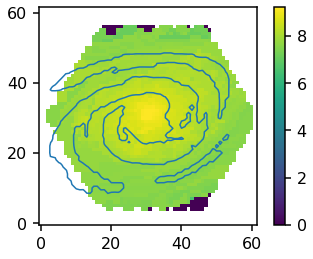

In [5]:
# Overlaying the masks as contours on the stellar mass map
ax = plt.subplot()
plt.imshow(mass)
ax.set_ylim(*ax.get_ylim()[::-1])
plt.colorbar()
ax.contour(data.spiral_mask_spaxel, levels=[4.5], zorder=20, colors='C0')

In [6]:
#getting location of spiral arm spaxels
galaxy = data.spiral_mask_spaxel
masking = data.spiral_mask_spaxel

In [7]:
#getting the values for stellar mass of arm vs interarm spaxels
arm = np.where(galaxy > 5,1,np.nan)
interarm = np.where(galaxy < 3,1,np.nan)
ma = mass*arm
mi= mass*interarm

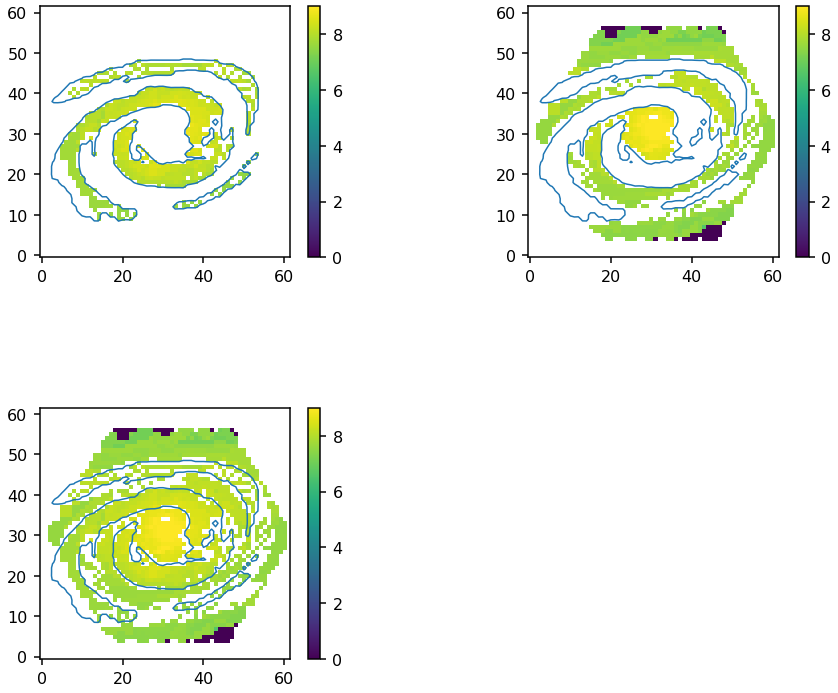

In [8]:
#Setting up the Multiplot
fig = plt.figure(figsize=(15, 12))
gs = gridspec.GridSpec(2, 2, wspace=0.4, hspace=0.6)

#Spiral arm stellar mass plot
ax = plt.subplot(gs[0, 0])
plt.imshow(ma, vmin=0, vmax=9)
ax.contour(data.spiral_mask_spaxel, levels=[4.5], zorder=20, colors='C0')
ax.set_ylim(*ax.get_ylim()[::-1])
plt.colorbar()

#Interarm region 
ax1 = plt.subplot(gs[0,1])
plt.imshow(mi, vmin=0, vmax=9)
ax1.contour(data.spiral_mask_spaxel, levels=[4.5], zorder=20, colors='C0')
ax1.set_ylim(*ax1.get_ylim()[::-1])
plt.colorbar()

#Combined plot
ax2 = plt.subplot(gs[1,0])
ax2.imshow(mi,vmin=0, vmax=9)
ax2.imshow(ma,vmin=0, vmax=9)
ax2.contour(data.spiral_mask_spaxel, levels=[4.5], zorder=20, colors='C0')
ax2.set_ylim(*ax2.get_ylim()[::-1])
plt.colorbar()

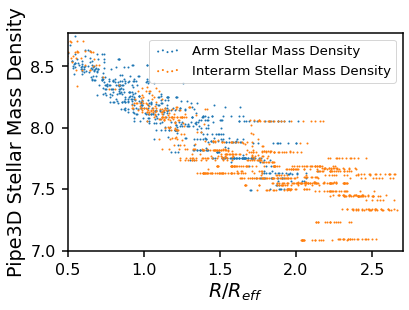

In [9]:
#stellar mass density vs radius
radius = maps.spx_ellcoo_r_re
plt.scatter(radius.value,ma,s=1,label='Arm Stellar Mass Density')
plt.scatter(radius.value,mi,s=1,label='Interarm Stellar Mass Density')
plt.xlabel(r'$ R/R_{eff} $')
plt.ylabel('Pipe3D Stellar Mass Density')
plt.ylim(7,8.77)
plt.xlim(0.5,2.7)
plt.legend()

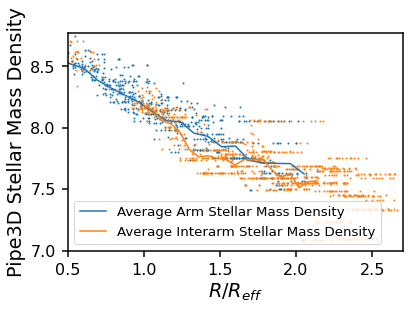

In [51]:
#stellar mass binned averages vs radius
radius = maps.spx_ellcoo_r_re
mask=np.where(np.isnan(ma),0,1)
mask2=np.where(np.isnan(mi),0,1)
mass_ma,radius_ma,binnumber = sci.binned_statistic(radius.value[mask!=0],ma[mask!=0],bins=20,range=[0.5,2.5])
mass_mi,radius_mi,binnnumber = sci.binned_statistic(radius.value[mask2!=0],mi[mask2!=0],bins=20,range=[0.5,2.5])
plt.scatter(radius.value,ma,s=1)
plt.scatter(radius.value,mi,s=1)
plt.xlabel(r'$ R/R_{eff} $')
plt.ylabel('Pipe3D Stellar Mass Density')
plt.ylim(7,8.77)
plt.xlim(0.5,2.7)
plt.plot(radius_ma[:-1], mass_ma,label='Average Arm Stellar Mass Density')
plt.plot(radius_mi[:-1],mass_mi,label='Average Interarm Stellar Mass Density')
plt.legend()